<a href="https://colab.research.google.com/github/Almuzhidul/Basic-Python/blob/main/Heckathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Library**

In [142]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score, train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression

#**Read Dataset**

In [143]:
data = pd.read_csv("/content/dataframe_.csv")
data.head()

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214


##**check the number of datasets**

In [144]:
len(data)

1697

#**Check the missing value**

In [145]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1697 entries, 0 to 1696
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   input   1696 non-null   float64
 1   output  1696 non-null   float64
dtypes: float64(2)
memory usage: 26.6 KB


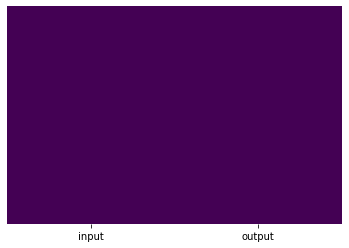

In [147]:
sns.heatmap(data.isnull(),cbar=False,yticklabels=False,cmap = 'viridis')

As  we can see at the output that there is no missing value

##**Displays a summary of data statistics**

In [148]:
data.describe()

,input,output
count,1696.000000,1696.000000
mean,1.159933,-34.088017
std,79.005970,65.771112
min,-134.962839,-132.422167
25%,-63.386506,-80.026767
50%,10.195194,-50.470981
75%,70.264109,-11.000000
max,134.605775,134.425495


##**Check and display the distribution of the dataset with scatter plots and histograms**

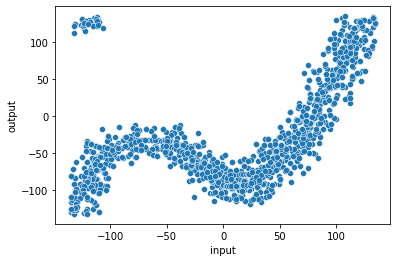

In [149]:
sns.scatterplot(data=data, x="input", y="output")

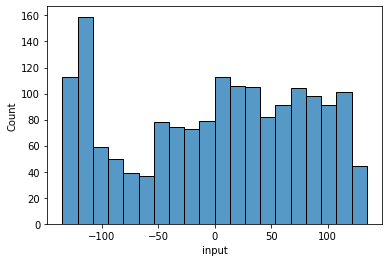

In [150]:
sns.histplot(data=data, x="input", bins=20)

##**Check Outlier**

In [151]:
fig = px.box(data, y="input")
fig.show()

from the picture above it can be seen that there are no outliers in the independent variables of this dataset

#**Clean Dataset**
This function is to clean the dataset of nan, Inf, and missing cells (for skewed datasets)

In [152]:
def clean_dataset(df):
    assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
    df.dropna(inplace=True)
    indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(axis=1)
    return df[indices_to_keep].astype(np.float64)

In [162]:
data = clean_dataset(data)
data

,input,output
0,-122.740667,-130.572085
1,-121.531419,-129.938929
2,-134.917019,-130.141832
3,-120.605951,-125.760932
4,-129.894781,-112.785214
...,...,...
1692,25.410184,-76.380902
1693,29.537304,-82.796934
1694,31.633331,-87.000000
1695,29.091458,-104.943052


#**Define independent variable and dependent variable**
In this step we should rehape the variabel independent because the dimension should be (-1,1)

In [154]:
#Mendefinisikan variabel X dan Y
X=np.array(data['input']).reshape((-1,1))
Y=np.array(data['output'])

##**Split Dataset into training dataset and testing dataset**
In this step we use split ratio 80:20

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#**Machine Learning Model**
We will use two models Gradient Boosting Regressor and Linear Regression

- The Gradient Boosting Regressor as our Base Model.GB builds an additive model in a forward stage-wise fashion; it allows for the optimization of arbitrary differentiable loss functions. In each stage a regression tree is fit on the negative gradient of the given loss function.
- Linear regression is an approach to modeling the relationship between a dependent variable and one or more independent variables

###**Gradient Boosting Regressor**

In [156]:
#define  our  GB model
GBR = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='huber', random_state =5)

In [157]:
#fitting he model on the train set
GBR.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=4,
                          max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=10, n_estimators=3000,
                          random_state=5)

In [158]:
#Cross Validation Error
rmse_cv(GBR).mean()

33.59561555596118

###**Model Validation**
For model validation we use R Squared, RMSE and MAE

In [159]:
# R squared, RMSE and Mean Absolute Error obtained by using actual and predicted values from Validate set
print('Validation R^2: %.5f'  % r2_score(y_test,GBR.predict(X_test)))
print('Validation RMSE: %.5f'   % mean_squared_error(y_test,GBR.predict(X_test)))
print('Validation Mean Absolute Error: %.5f'   % mean_absolute_error(y_test,GBR.predict(X_test)))

Validation R^2: 0.65025
Validation RMSE: 1606.11858
Validation Mean Absolute Error: 19.87163


###**Linear Regression**

In [160]:
regr = linear_model.LinearRegression()
regr.fit(X_train,y_train)

LinearRegression()

In [163]:
#Cross Validation Error
rmse_cv(regr).mean()

54.94287333992152

###**Model Validation**
For model validation we use R Squared, RMSE and MAE

In [161]:
# R squared, RMSE and Mean Absolute Error obtained by using actual and predicted values from Validate set
print('Validation R^2: %.5f'  % r2_score(y_test,regr.predict(X_test)))
print('Validation RMSE: %.5f'   % mean_squared_error(y_test,regr.predict(X_test)))
print('Validation Mean Absolute Error: %.5f'   % mean_absolute_error(y_test,regr.predict(X_test)))

Validation R^2: 0.15650
Validation RMSE: 3873.53289
Validation Mean Absolute Error: 46.16647


The Best Model here is the Gradient Boosting Regressor which manages to produce a minimum cross validation error and highest R- squared and minimal RMSE and Mean Absolute Error.